In [ ]:
%matplotlib inline
import ogr
import shapely
from shapely.geometry import *
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

ModuleNotFoundError: No module named 'ogr'

# Enunciado Proyecto 

Encargados de planeación en las ciudades esperan medir el impacto que tienen las medidas o proyectos de infraestructura que se ejecutan sobre las ciudades. Pocas veces se cuentan con las herramientas suficientes para medir este impacto. En ese sentido, Uber MOVEMENT le brinda herramientas a las personas involucradas en la toma de decisiones de una ciudad. Uber MOVEMENT provee los tiempos agregados de los viajes realizados entre las diferentes zonas de la ciudad de Bogotá D.C. 

En el taller de Pandas, se había formulado la pregunta de cuanto había mejorado la movilidad (**luego de la implementación del deprimido de la 94**) entre la zona de la AV Cra. 30 entre 26 y Américas (Supercade de la 30), y la zona cercana a Unicentro. Se evidenció que entre el segundo trimestre de 2016 y el segundo trimestre de 2017, hubo una mejora de hasta el 28% de los tiempos de viaje entre el Supercade de la 30 y Unicentro.

En esta ocasión queremos visualizar la mejora de la movilidad no solo hacia Unicentro, sino hacia todos los sectores que probablemente hagan uso del deprimido de la 94 como vía de acceso. Sin embargo, la información agregada de Uber brinda una oportunidad para medir la accesibilidad a puntos de interés como hospitales. Dicha información permite medir qué tan accesible es un hospital en determinada área.

Por otro lado, el objetivo de los tomadores de decisiones de la ciudad es reducir la brecha de desigualdad, generando alternativas serias de movilidad para las personas más vulnerables, brindando las mismas oportunidades a personas con condiciones socioeconómicas tanto favorables como vulnerables. La estratificación clasifica grupos de personas que tienen condiciones sociales y económicas similares [Mayor información sobre estratificación](http://www.sdp.gov.co/portal/page/portal/PortalSDP/InformacionTomaDecisiones/Estratificacion_Socioeconomica/QueEs). A pesar de que la estratificación se hace netamente con la úbicación del predio, un análisis válido consiste en determinar la accesibilidad de las zonas de estratos bajos con respecto a los estratos altos. El ejercicio final propuesto en este taller, consiste en analizar la composición de estratos por cada localidad y su accesibilidad a través de la comparación de tiempos de viaje hacía los diferentes estratos

Durante este taller se reforzarán las siguientes áreas:

- Manejo de datos georeferenciados.
- Creación de nuevas columnas en Pandas.
- Manejo de Geopandas.
- Limpieza de información usando OpenStreetMap.
- Limpieza de archivos y filtrado de información útil en Python.
- Generación de gráficos en Plotly.

Para la realización de este taller se requiere la instalación de `gdal`.

```bash
conda install gdal

```

**RECOMENDACIONES**:
- Incluya su código sólo donde se solicita. Todas las secciones dónde se pide incluír código, están delimitadas por el título `Ejercicio`. 
- Desarrolle en orden el taller. Las primeras secciones generan unos DataFrames que son usados posteriormente por las últimas secciones.
- Use el tutorial de GeoPandas como referencia, así como el taller anterior de Pandas.
- Have fun!


# 1 - ¿Cómo impactó el deprimido de la 94 a la movilidad hacia el norte de la ciudad?

En el taller de Pandas observamos la mejora entre dos zonas que probablemente hacen uso del deprimido de la 94 como vía de acceso. En este punto el objetivo es construir un mapa cloroplético que permita conocer en qué porcentaje mejoró o emperó la movilidad entre el segundo bimestre de 2016 y el segundo bimestre de 2017. Recordemos que el deprimido fue inaugurado en Marzo de 2017.

Para este punto se van a usar los siguientes archivos:
- `bogota_cadastral.json`: contiene la información georeferenciada de 1160 zonas que componen a la ciudad de Bogotá D.C. (Incluído Sumapaz)
- `bogota-cadastral-2017-2-OnlyWeekdays-HourlyAggregate.csv`: contiene la información de viajes entre semana entre un origen y un destino en la ciudad de Bogotá, para el segundo trimestre de 2017. Se encuentra discriminada por la hora en la que se realizó el viaje.
- `bogota-cadastral-2016-2-OnlyWeekdays-HourlyAggregate.csv`: contiene la información de viajes entre semana entre un origen y un destino en la ciudad de Bogotá, para el segundo trimestre de 2016. Se encuentra discriminada por la hora en la que se realizó el viaje.

### **Genere un mapa cloroplético de los tiempos de desplazamiento desde el Supercade de la 30 a las 7 de la noche. El mapa debe contener 10 categorías.**

Cargue la información catastral de Bogotá contenida en el archivo `data/uber/bogota_cadastral.json`. Esta información puede ser cargada con GeoPandas. Por otro lado, cargue la información de viajes entre semana agregados hora a hora para el segundo trimestre de 2016 y para el segundo trimestre de 2017.

In [ ]:
import geopandas as gpd

df_bogota = gpd.read_file('data/uber/bogota_cadastral.json')
df_bogota.MOVEMENT_ID = df_bogota.MOVEMENT_ID.astype(np.int64)

df_2017_2 = pd.read_csv('data/uber/2017-2/bogota-cadastral-2017-2-OnlyWeekdays-HourlyAggregate.csv')
df_2016_2 = pd.read_csv('data/uber/2016-2/bogota-cadastral-2016-2-OnlyWeekdays-HourlyAggregate.csv')

### Ejercicio

Usando `.loc` filtre aquellos registros de `df_bogota` que no reporten ningún viaje en `df_2017_2`. Guarde los datos filtrados en `df_bogota`

In [ ]:
# ESCRIBA SU CÓDIGO AQUÍ


In [ ]:
# PRUEBE SU CÓDIGO AQUÍ
df_bogota.head()

cartodb_id scacodigo  scatipo      scanombre  shape_leng  shape_area  \
0          12    004575        0   LOS LAURELES    0.027741    0.000037   
2          45    102502        1  EL UVAL RURAL    0.171333    0.000708   
3          74    005501        0    PALO BLANCO    0.017187    0.000018   
4          77    009240        0     POTRERILLO    0.010527    0.000007   
5         108    007208        0  BANCO CENTRAL    0.014862    0.000013   

   MOVEMENT_ID               DISPLAY_NAME  \
0            1   LOS LAURELES, 004575 (1)   
2            3  EL UVAL RURAL, 102502 (3)   
3            4    PALO BLANCO, 005501 (4)   
4            5     POTRERILLO, 009240 (5)   
5            6  BANCO CENTRAL, 007208 (6)   

                                            geometry  
0  (POLYGON ((-74.200295 4.617249, -74.2002849999...  
2  (POLYGON ((-74.11930700000001 4.490175, -74.11...  
3  (POLYGON ((-74.09353299999999 4.681014, -74.09...  
4  (POLYGON ((-74.097435 4.735314, -74.096203 4.7...  
5  (POLYGON ((-74.071786 4.642472, -74.0715430000...

In [ ]:
df_2017_2.head()

sourceid  dstid  hod  mean_travel_time  standard_deviation_travel_time  \
0         4      6    0            853.22                          344.13   
1         4      8    6           1793.80                          525.03   
2         4      9    9           2028.88                          438.35   
3         5      4   19           1346.33                          183.04   
4         6      4   10           1336.50                          443.70   

   geometric_mean_travel_time  geometric_standard_deviation_travel_time  
0                      788.49                                      1.48  
1                     1721.41                                      1.33  
2                     1983.36                                      1.24  
3                     1334.16                                      1.14  
4                     1275.49                                      1.34

Como observa en la parte superior. `df_2017_2` contiene por cada fila un origen y un destino a determinada hora del día. Para cada uno de estos registros muestra la información del tiempo de viaje promedio, la desviación estándar, la media geométrica del tiempo y la desviación estándar de la media geométrica. 

**IMPORTANTE**:

Cada origen y destino registrado acá corresponde a una zona registrada en el archivo `bogota_cadastral.json`. La columna que une ambos atributos se llama `MOVEMENT_ID`

Si deseamos filtrar todos los viajes a las 7pm, lo podemos hacer usando:

In [ ]:
df_2017_2.loc[df_2017_2['hod'] == 19].head()

sourceid  dstid  hod  mean_travel_time  standard_deviation_travel_time  \
3           5      4   19           1346.33                          183.04   
90          6     72   19           2267.32                         1560.31   
104         6     85   19           2797.11                          704.51   
105         9     55   19           1157.62                          560.88   
117         9     68   19           1265.75                          359.78   

     geometric_mean_travel_time  geometric_standard_deviation_travel_time  
3                       1334.16                                      1.14  
90                      2024.53                                      1.49  
104                     2701.83                                      1.31  
105                     1066.61                                      1.47  
117                     1219.88                                      1.31

#### Ejercicio

Defina una función que regrese un dataframe y permita filtrar `df_2017_2` o `df_2016_2` por un origen definido y una hora definida. En la siguiente celda puede encontrar un ejemplo de como debe ser llamada esta función y qué resultado debe generar. El valor 644 corresponde precisamente a la zona dónde se encuentra el supercade de la 30.

In [ ]:
# Construya esta función

def filter_df_by_source_hod(df, sourceid, hod, value='mean_travel_time'):
    # FIltre por hora y sourceid
    
    # Regrese únicamente los destinos acompañados por su tiempo promedio de viaje

In [ ]:
# Verifique ue la función haya sido definida de forma correcta con este código de prueba
# 

df = filter_df_by_source_hod(df_2016_2, 644, 19, value='mean_travel_time')
df.head()

dstid  mean_travel_time
3429     526           2175.47
4420     658           2655.56
11941    966           1413.65
16833    306           3412.38
23083    504           2667.25

#### Ejercicio

Como se puede evidenciar, usted acaba de extraer los tiempos promedios a cada zona en la ciudad de Bogotá. Ahora debe hacer una *unión de atributos* entre el dataframe `df` y `df_bogota`. Esto con el objetivo de conocer los nombres y los datos geográficos de cada uno de los destinos que están consignados en `df`. 

In [ ]:
df.rename(columns={"dstid": "MOVEMENT_ID", 'mean_travel_time': "time_2016"}, inplace=True)

# PONGA SU CÓDIGO AQUÍ

# Haga un spatial merge entre df_bogota y df, usando la columna MOVEMENT_ID
# Cree una nueva columna que represente el tiempo en minutos.

In [ ]:
# PRUEBE SU CÓDIGO AQUÍ

df_times.head()

cartodb_id scacodigo  scatipo      scanombre  shape_leng  shape_area  \
0          74    005501        0    PALO BLANCO    0.017187    0.000018   
1         108    007208        0  BANCO CENTRAL    0.014862    0.000013   
2         183    004104        0  LA ESTANZUELA    0.029466    0.000036   
3         223    003102        0     LAS NIEVES    0.024801    0.000037   
4         290    003108        0   LA CAPUCHINA    0.021162    0.000024   

   MOVEMENT_ID               DISPLAY_NAME  \
0            4    PALO BLANCO, 005501 (4)   
1            6  BANCO CENTRAL, 007208 (6)   
2            8  LA ESTANZUELA, 004104 (8)   
3            9     LAS NIEVES, 003102 (9)   
4           12  LA CAPUCHINA, 003108 (12)   

                                            geometry  time_2016  \
0  (POLYGON ((-74.09353299999999 4.681014, -74.09...    1658.77   
1  (POLYGON ((-74.071786 4.642472, -74.0715430000...     627.56   
2  (POLYGON ((-74.091623 4.597399, -74.091398 4.5...     869.79   
3  (POLYGON ((-74.073802 4.60692, -74.07320199999...     280.79   
4  (POLYGON ((-74.078091 4.606167, -74.077551 4.6...     689.60   

   time_minutes_2016  
0          27.646167  
1          10.459333  
2          14.496500  
3           4.679833  
4          11.493333

Para propósitos de visualización, vamos a recoger los centroides de las zonas donde se encuentran el deprimido de la 94 (953) y el supercade de la 30 (644)

In [ ]:
source_dest_points = df_bogota.loc[df_bogota['MOVEMENT_ID'].isin([644, 953])]
cents = source_dest_points.centroid
cents.head()

643    POINT (-74.08004747802593 4.623532947145633)
952    POINT (-74.04864053822101 4.676857296680346)
dtype: object

#### Ejercicio:

Use `df_times.plot()` para realizar un mapa cloroplético.

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title(u'Tiempo promedio de viaje desde el Supercade de la 30 en el 2016')

##### INGRESE AQUÍ SU CÓDIGO

# Imprima un mapa cloroplético usando la columna time_minutes_2016 en
# el GeoDataFrame df_times. El mapa debe tener un título, un colormap definido,
# debe estar definido en 10 categorías. 


##### NO MODIFIQUE EL CÓDIGO ABAJO

df_bogota.plot(color='None', edgecolor='black', linewidth=0.1, ax=ax)
cents.plot(color='Red', ax=ax)

props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point, txt in zip(cents.iteritems(), ['SUPERCADE', '94']):
    ax.text(point[1].x-0.015,
            point[1].y+0.01,
            txt,
            horizontalalignment='center',
            fontsize=9,
            bbox=props)

ax.set_axis_off()
plt.axis('equal')

(-74.23244790000003, -73.98948209999999, 4.4353856, 4.856078399999999)

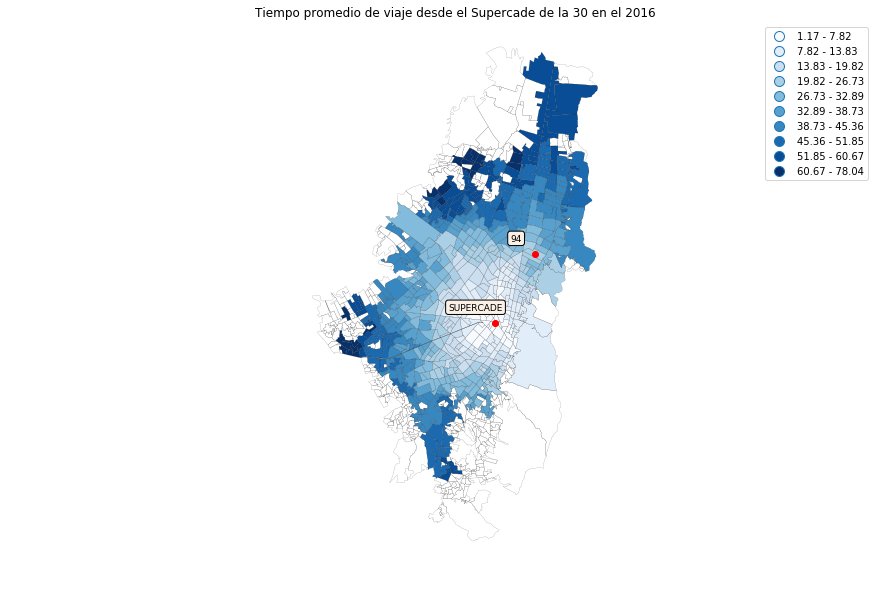

In [ ]:
# NO MODIFIQUE ESTA CELDA

### Genere un mapa que visualice en qué porcentaje mejoró la movilidad DESDE el supercade de la 30 entre el segundo trimestre de 2016 y el segundo trimestre de 2017.

#### Ejercicio

Aplique el mismo flujo de trabajo con `df_2016_2`, pero esta vez para `df_2017_2`. Siga las instrucciones a continuación.

In [ ]:
value = 'mean_travel_time'

df = filter_df_by_source_hod(df_2017_2, 644, 19, value)
df.rename(columns={"dstid": "MOVEMENT_ID", value: "time_2017"}, inplace=True)


# INGRESE SU CÓDIGO AQUÍ
# Haga una unión de atributos entre df_times y el df que acaba de definir arriba
# Cree la columna time_minutes_2017 que represente el tiempo en minutos

df_times = gpd.GeoDataFrame.merge(df_times, df, on='MOVEMENT_ID')
df_times['time_minutes_2017'] = df_times['time_2017'] / 60

#### Ejercicio

Ahora, debemos construir una columna que exprese en terminos porcentuales, la mejora de tiempos. Recuerde que si el tiempo a un destino es el mismo entre 2016 y 2017, el valor que debe tomar esta columna es cero.

In [ ]:
# INGRESE SU CÓDIGO AQUÍ
# Cree una columna diff que exprese el cambio porcentual en tiempos desde 2016_2 hacía 2017_2


In [ ]:
# PRUEBE SU CÓDIGO AQUÍ

df_times.head()

cartodb_id scacodigo  scatipo      scanombre  shape_leng  shape_area  \
0          74    005501        0    PALO BLANCO    0.017187    0.000018   
1         108    007208        0  BANCO CENTRAL    0.014862    0.000013   
2         183    004104        0  LA ESTANZUELA    0.029466    0.000036   
3         223    003102        0     LAS NIEVES    0.024801    0.000037   
4         290    003108        0   LA CAPUCHINA    0.021162    0.000024   

   MOVEMENT_ID               DISPLAY_NAME  \
0            4    PALO BLANCO, 005501 (4)   
1            6  BANCO CENTRAL, 007208 (6)   
2            8  LA ESTANZUELA, 004104 (8)   
3            9     LAS NIEVES, 003102 (9)   
4           12  LA CAPUCHINA, 003108 (12)   

                                            geometry  time_2016  \
0  (POLYGON ((-74.09353299999999 4.681014, -74.09...    1658.77   
1  (POLYGON ((-74.071786 4.642472, -74.0715430000...     627.56   
2  (POLYGON ((-74.091623 4.597399, -74.091398 4.5...     869.79   
3  (POLYGON ((-74.073802 4.60692, -74.07320199999...     280.79   
4  (POLYGON ((-74.078091 4.606167, -74.077551 4.6...     689.60   

   time_minutes_2016  time_2017  time_minutes_2017       diff  
0          27.646167    1615.41          26.923500   2.684148  
1          10.459333     613.73          10.228833   2.253434  
2          14.496500     841.70          14.028333   3.337294  
3           4.679833     288.26           4.804333  -2.591411  
4          11.493333     609.85          10.164167  13.076986

#### Ejercicio

Genere el mapa cloroplético usando la columna diff como columna de clasificación. Use el Colormap `plt.cm.coolwarm`. Puede usar el código del anterior mapa como base.

In [ ]:
# PRUEBE SU CÓDIGO EN ESTA CELDA


(-74.23244790000003, -73.98948209999999, 4.4353856, 4.856078399999999)

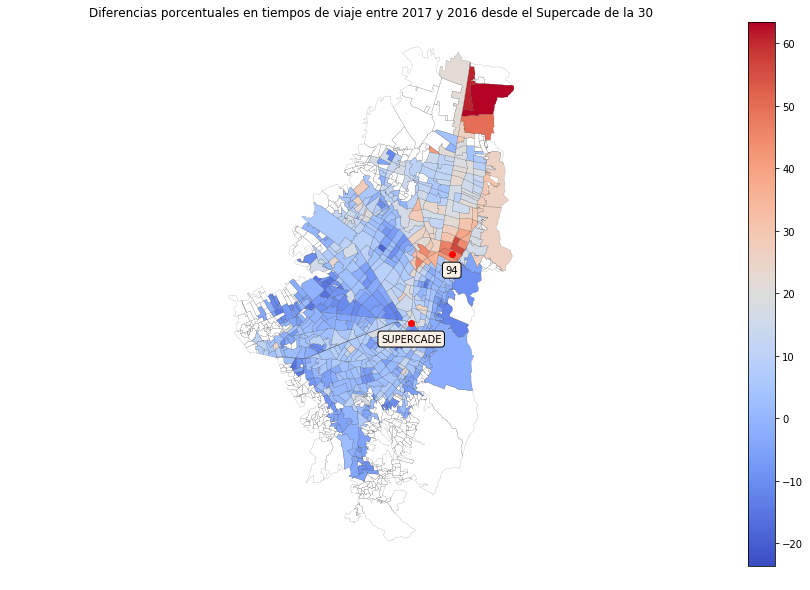

In [ ]:
# NO MODIFIQUE ESTA CELDA

Tip: Consulte más acerca de los [Colormaps](https://matplotlib.org/users/colormaps.html) de Matplotlib, en caso de que desee usar otro mapa de colores.

# 2- ¿Qué tan accesibles son los hospitales de la zona de Teusauillo?

In [ ]:
osm = """
<iframe width="500" height="400" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" \
src="http://www.openstreetmap.org/export/embed.html?bbox=\
-74.0918%2C4.6214%2C-74.0685%2C4.6484&amp;layer=mapnik" \
style="border: 1px solid black"></iframe><br/><small><a \
href="http://www.openstreetmap.org/#map=17/37.78292/-122.46336">View Larger Map</a></small>
"""
display.HTML(osm)

OpenStreetMap se alimenta de la información generada por los usuarios para georeferenciar lugares como avenidas, parques, hospitales, cafe, entre otros. OpenStreetMap nos permite descargar un OSM file ([Ejemplo](https://www.openstreetmap.org/export#map=15/4.6365/-74.0803)), que contiene la información acerca de las vías, los puntos de interés, los caminos y todos los datos georeferenciados de una zona seleccionada. Para este caso se han descargado los puntos de interés de la zona de Teusaquillo. A partir de esta zona, se descargaron todos los datos disponibles por OSM.

In [ ]:
driver=ogr.GetDriverByName('OSM')
data = driver.Open('data/uber/teusaquillo.osm')
layer = data.GetLayer('points')

features=[x for x in layer]
print(len(features))

4926


Existen tan solo en esta zona 4926 puntos georeferenciados. Los puntos de interés se encuentran como `amenity`, y deben ser extraídos como puntos. La clase **Point** descrita en el tutorial de GeoPandas, define todo lo necesario para manejarlos como figuras geométricas.

In [ ]:
data_list=[]
for feature in features:
    data=feature.ExportToJson(as_object=True) # Se convierte a JSON
    coords=data['geometry']['coordinates'] # Extraemos las coordenadas
    shapely_geo=Point(coords[0],coords[1]) # Usamos shapely para representar las coordenadas
    name=data['properties']['name'] # Extraemos el nombre
    highway=data['properties']['highway'] # Extraemos la dirección 
    other_tags=data['properties']['other_tags']
    if other_tags and 'amenity' in other_tags:
        feat=[x for x in other_tags.split(',') if 'amenity' in x][0] # Se filtran aquellos tags que correspondan a los amenities
        amenity=feat[feat.rfind('>')+2:feat.rfind('"')] # Se extraen los amenities
    else:
        amenity=None
    data_list.append([name, highway, amenity, shapely_geo]) # Data_list contiene en cada fila, un punto de interés

    
# A continuación se crea un GeoDataFrame con las observaciones y el sistema de coordenadas (CRS)
gdf=gpd.GeoDataFrame(data_list, columns=['Name','Highway','Amenity','geometry'], crs={'init': 'epsg:4326'})

In [ ]:
gdf.tail()

Name          Highway     Amenity  \
4921                   Amen Ramen             None  restaurant   
4922  Agencia de Desarrollo Rural             None        None   
4923                         None  traffic_signals        None   
4924       Edificio don Sebastián             None        None   
4925                         None             None        None   

                                  geometry  
4921         POINT (-74.0622486 4.6398842)  
4922         POINT (-74.0956783 4.6465511)  
4923  POINT (-74.06984300000001 4.6493373)  
4924         POINT (-74.0774528 4.6368973)  
4925         POINT (-74.0780324 4.6264496)

#### Ejercicio

Filtre aquellos puntos de interés que corresponda a `hospital`

In [ ]:
# INGRESE SU CÓDIGO AQUÍ


In [ ]:
# NO MODIFIQUE ESTA CELDA, USELA PARA PROBAR LA CREACIÓN DEL DATAFRAME hospital_df

hospital_df = hospital_df[hospital_df['Name'].notnull()] # Filtra aquellos hospitales con nombre nulo
G = hospital_df["geometry"].apply(lambda geom: geom.wkb) # Filtra aquellos hospitales duplicados por ubicación
hospital_df = hospital_df.loc[G.drop_duplicates().index]
hospital_df

Name Highway   Amenity  \
295                   Hospital Militar    None  hospital   
800                        Salud Total    None  hospital   
808                      Clínica Nueva    None  hospital   
1449     Instituto Laboratorio Clinico    None  hospital   
2298           Urgencias Clinica Marly    None  hospital   
2442                 IPS CRC Valoramos    None  hospital   
3048    Hospital Universiario Nacional    None  hospital   
3184  Centro Odontologíco Fuerza Aérea    None  hospital   

                                  geometry  
295   POINT (-74.06209440000001 4.6342409)  
800          POINT (-74.0788582 4.6359714)  
808          POINT (-74.0707929 4.6343166)  
1449          POINT (-74.0670123 4.625976)  
2298         POINT (-74.0654059 4.6369329)  
2442         POINT (-74.0662134 4.6292389)  
3048         POINT (-74.0952601 4.6488289)  
3184         POINT (-74.0765505 4.6413289)

A continuación encuentra un mapa que refleje la ubicación de los hospitales obtenidos

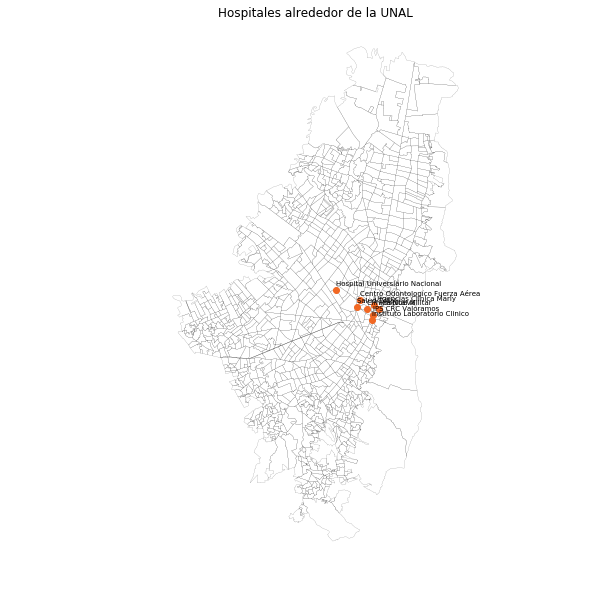

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title(u'Hospitales alrededor de la UNAL')
df_bogota_filtered.plot(color='None', edgecolor='black', linewidth=0.1, ax=ax)
ax.set_axis_off()
plt.axis('equal')

for i,row in hospital_df.iterrows():
    x=row['geometry'].x
    y=row['geometry'].y
    plt.annotate(row['Name'], xy=(x, y), size=7, xytext=(0, 5), textcoords='offset points')
    plt.plot(x, y,'o', color='#f16824')
    ax.set(aspect=1)

#### Ejercicio

Cada punto que presenta un hospital, debe ser relacionado con el dataframe `df_bogota`. Recordemos que `df_bogota` guarda la información correspondiente a las zonas de UBER Movement. Por consiguiente es importante referenciar en qué zona se encuentran los puntos que hayamos usando OpenStreetMap

Use una unión espacial para asociar ambos dataframes (`df_bogota` y `df_hospital`) y que genere el resultado mostrado dos celdas abajo.

In [ ]:
# INGRESE SU CÓDIGO AQUÍ

In [ ]:
# PRUEBE SU CÓDIGO AQUÍ

In [ ]:
# NO MODIFIQUE ESTA CELDA

hospital_df

Name Highway   Amenity  \
295                   Hospital Militar    None  hospital   
800                        Salud Total    None  hospital   
808                      Clínica Nueva    None  hospital   
1449     Instituto Laboratorio Clinico    None  hospital   
2298           Urgencias Clinica Marly    None  hospital   
2442                 IPS CRC Valoramos    None  hospital   
3048    Hospital Universiario Nacional    None  hospital   
3184  Centro Odontologíco Fuerza Aérea    None  hospital   

                                  geometry  MOVEMENT_ID  
295   POINT (-74.06209440000001 4.6342409)          619  
800          POINT (-74.0788582 4.6359714)          570  
808          POINT (-74.0707929 4.6343166)          177  
1449          POINT (-74.0670123 4.625976)          191  
2298         POINT (-74.0654059 4.6369329)          255  
2442         POINT (-74.0662134 4.6292389)          701  
3048         POINT (-74.0952601 4.6488289)          829  
3184         POINT (-74.0765505 4.6413289)          220

`MOVEMENT_ID` corresponde a la zona de Uber, donde se encuentra el hospital.

#### Ejercicio

Ahora vamos a filtrar el conjunto de datos de Uber, por las zonas de destino que contienen a los hospitales. Para esto primero filtramos `df_2017_2` por las celdas cuya columna `dstid` se encuentre en las zonas de los hospitales. Posteriormente, agrupamos los tiempos de viaje desde los diferentes orígenes y escogemos como función de agregación la función min().

In [ ]:
# INGRESE SU CÓDIGO ACÁ



In [ ]:
# PRUEBE SU CÓDIGO ACÁ
df_2017_hospital_times.head()

In [ ]:
#NO MODIFIQUE ESTA CELDA

df_2017_hospital_times.head()

dstid  hod  mean_travel_time  standard_deviation_travel_time  \
sourceid                                                                 
1           570    5           2897.58                          323.88   
3           570    0           1336.29                           87.57   
4           177    0            571.38                          192.95   
5           570    5           2479.00                          517.65   
6           177    0             89.56                           89.20   

          geometric_mean_travel_time  geometric_standard_deviation_travel_time  
sourceid                                                                        
1                            2821.83                                      1.10  
3                            1333.46                                      1.07  
4                             538.49                                      1.16  
5                            2422.32                                      1.24  
6                              66.23                                      1.32

Aplicamos las siguientes operaciones para obtener los tiempos mínimos desde cualquier zona de Bogotá hacía las zonas de los hospitales demarcados.

In [ ]:
# En orden hacemos lo siguiente:
# Linea 1 - Convertimos el indice en una columna más
# Linea 2 - Extraemos solo la columna de origen y de tiempo promedio
# Línea 3 - Renombramos las columnas
# Línea 4 - Imprimimos los primeros 5 registros

df_2017_hospital_times.reset_index(inplace=True)
df_2017_hospital_times = df_2017_hospital_times[['sourceid', 'mean_travel_time']]
df_2017_hospital_times.rename(columns={"sourceid": "MOVEMENT_ID", value: "time"}, inplace=True) 
df_2017_hospital_times.head()

MOVEMENT_ID     time
0            1  2897.58
1            3  1336.29
2            4   571.38
3            5  2479.00
4            6    89.56

#### Ejercicio

Fusione `df_bogota` con `df_2017_hospital_times` en la columna `MOVEMENT_ID`. Cree una nueva columna que corresponde al tiempo en minutos.

In [ ]:
# INGRESE SU CÓDIGO AQUÍ


In [ ]:
# PRUEBE SU CODIGO AQUÍ


In [ ]:
# NO MODIFIQUE ESTA CELDA

df_times.head()

cartodb_id scacodigo  scatipo      scanombre  shape_leng  shape_area  \
0          12    004575        0   LOS LAURELES    0.027741    0.000037   
1          45    102502        1  EL UVAL RURAL    0.171333    0.000708   
2          74    005501        0    PALO BLANCO    0.017187    0.000018   
3          77    009240        0     POTRERILLO    0.010527    0.000007   
4         108    007208        0  BANCO CENTRAL    0.014862    0.000013   

   MOVEMENT_ID               DISPLAY_NAME  \
0            1   LOS LAURELES, 004575 (1)   
1            3  EL UVAL RURAL, 102502 (3)   
2            4    PALO BLANCO, 005501 (4)   
3            5     POTRERILLO, 009240 (5)   
4            6  BANCO CENTRAL, 007208 (6)   

                                            geometry     time  time_minutes  
0  (POLYGON ((-74.200295 4.617249, -74.2002849999...  2897.58     48.293000  
1  (POLYGON ((-74.11930700000001 4.490175, -74.11...  1336.29     22.271500  
2  (POLYGON ((-74.09353299999999 4.681014, -74.09...   571.38      9.523000  
3  (POLYGON ((-74.097435 4.735314, -74.096203 4.7...  2479.00     41.316667  
4  (POLYGON ((-74.071786 4.642472, -74.0715430000...    89.56      1.492667

#### Ejercicio

Genere un mapa cloroplético sobre los tiempos de viaje HACÍA los diferentes hospitales de Teusaquillo. Use la columna que recién creo como columna de clasificación.

In [ ]:
# INGRESE Y PRUEBE SU CÓDIGO AQUÍ


(-74.23244790000001, -73.98948209999999, 4.4353856, 4.8560783999999995)

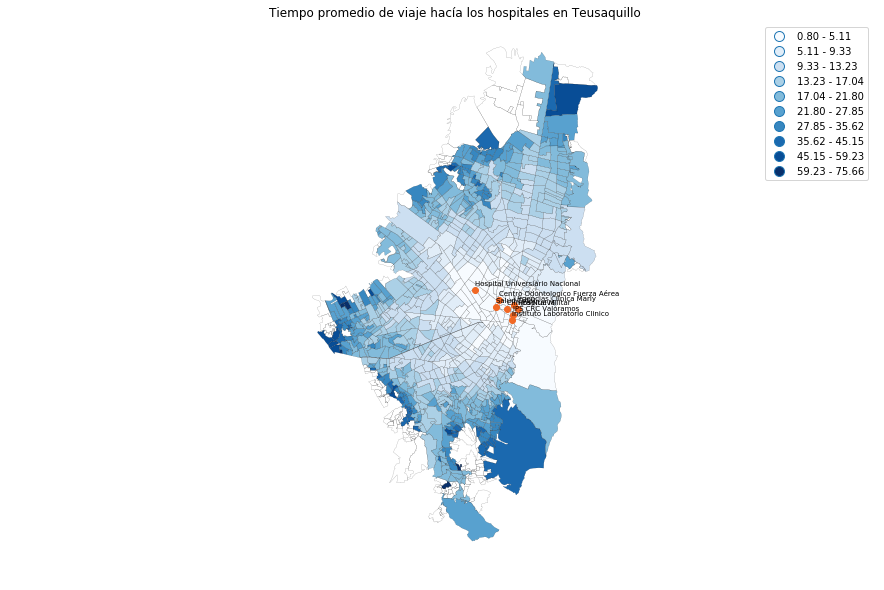

In [ ]:
# NO MODIFIQUE ESTA CELDA

### Bonus: 
Descargue la información de otra zona de Bogotá y evalue la accesibilidad a otro tipo de zonas como Restaurantes en Modelia.

# 3- ¿Existe una relación entre la estratificación y las condiciones de movilidad en Bogotá D.C.?

La estratificación permite clasificar a la población en diferentes grupos socioeconómicos. La estratificación define elementos como los subsidios que asigna el gobierno para el cobro de los servicios públicos domiciliarios. Aquellas personas que viven en domicilios de estrato alto pagan más por los servicios públicos, contribuyendo a los hogaros de estrato bajo. Sin embargo, la estratificación también está determinada por las condiciones de acceso y movilidad del domicilio. Durante este ejercicio, vamos a analizar la información de estratos y luego evaluaremos las condiciones de movilidad usando la información provista por UBER Movement.

Vamos a usar los siguientes archivos:
- `bogota-estratos-2013.json`: Contiene los polígonos correspondientes a las manzanas de Bogotá D.C.. Contiene información adicional como los estratos y la fecha en que se realizó la estratificación.
- `bogota-localidades.geojson`: Contiene la información geográfica de las 20 localidades del Distrito Capital.
- `bogota_cadastral.json`: contiene la información georeferenciada de 1160 zonas que componen a la ciudad de Bogotá D.C. (Incluído Sumapaz)
- `bogota-cadastral-2017-2-OnlyWeekdays-HourlyAggregate.csv`: contiene la información de viajes entre semana entre un origen y un destino en la ciudad de Bogotá, para el segundo trimestre de 2017. Se encuentra discriminada por la hora en la que se realizó el viaje.

Este ejercicio supone un reto adicional, puesto que el JSON que contiene la información, no viene en un formato de carga directa a GeoPandas. Primero cargue el JSON y visualice la información que contiene.

In [ ]:
df = pd.read_json('data/uber/bogota_estratos_2013.json')

In [ ]:
df.head()

datasetid  \
0  estratificacion-socioeconomica-2013@bogota-lab...   
1  estratificacion-socioeconomica-2013@bogota-lab...   
2  estratificacion-socioeconomica-2013@bogota-lab...   
3  estratificacion-socioeconomica-2013@bogota-lab...   
4  estratificacion-socioeconomica-2013@bogota-lab...   

                                              fields  \
0  {u'shape_area': 61354.8489853, u'globalid': u'...   
1  {u'shape_area': 595.400836675, u'globalid': u'...   
2  {u'shape_area': 1800.64786368, u'globalid': u'...   
3  {u'shape_area': 1137.07571719, u'globalid': u'...   
4  {u'shape_area': 2207.0964316, u'globalid': u'{...   

                                            geometry  \
0  {u'type': u'Point', u'coordinates': [-74.10514...   
1  {u'type': u'Point', u'coordinates': [-74.10213...   
2  {u'type': u'Point', u'coordinates': [-74.10722...   
3  {u'type': u'Point', u'coordinates': [-74.10388...   
4  {u'type': u'Point', u'coordinates': [-74.10635...   

            record_timestamp                                  recordid  
0  2017-10-28T00:09:39-05:00  5d519128f1f380096221d62aac227441ed97f694  
1  2017-10-28T00:09:39-05:00  b8a735877e5b4d73da693b16be75bf2e47d981c9  
2  2017-10-28T00:09:39-05:00  fc6258591bf18c5c9db08101be635e84a581b964  
3  2017-10-28T00:09:39-05:00  41f77989dbadd7bcf2083d6781c30e91a3bb1b4a  
4  2017-10-28T00:09:39-05:00  e5e953aabf9df5bb1607216a619c59111e65dd26

In [ ]:
df['fields'][1]

{u'codigo_criterio': u'394',
 u'codigo_manzana': u'00260549',
 u'codigo_zonaest': 19,
 u'estrato': 0,
 u'fecha_acto': u'2017-07-27T21:00:00-05:00',
 u'fecha_captura': u'2017-07-27T21:00:00-05:00',
 u'geo_point_2d': [4.5100035667319265, -74.102139454267],
 u'geo_shape': {u'coordinates': [[[-74.10205090927423, 4.510120330233975],
    [-74.10203515197718, 4.510031416582815],
    [-74.10202769577712, 4.509986854924595],
    [-74.10202030983895, 4.509942221858372],
    [-74.10201278248763, 4.509897588783347],
    [-74.1021207997112, 4.50989222774242],
    [-74.10222874668095, 4.509886796172888],
    [-74.102236202888, 4.50993142924147],
    [-74.10224358884352, 4.509975991797412],
    [-74.10225104595735, 4.510020554357579],
    [-74.10226588812947, 4.510109679473147],
    [-74.10221198488296, 4.510112430520912],
    [-74.10215801138801, 4.5101150396399525],
    [-74.1021030533857, 4.510117861123295],
    [-74.10205090927423, 4.510120330233975]]],
  u'type': u'Polygon'},
 u'globalid': u'{5B

Para definir un GeoDataFrame, tenga en cuenta que cada fila debe tener mínimo una columna que se llame `geometry` y un sistema de coordenadas de referencia.

#### Ejercicio

Complete la siguiente función para construir el GeoDataFrame. Use lo aprendido en el taller de GeoPandas

In [ ]:
from geopandas import GeoDataFrame
from shapely.geometry import Polygon, MultiPolygon

geometry = []
values = []

# MODIFIQUE LAS LÍNEAS QUE SE SOLICITAN

for idx, row_value in df.iterrows():
    if row_value.fields.get('geo_shape', 0) == 0:
        continue
    
    if row_value.fields['geo_shape']['type'] == 'Polygon':
        geometry.append( #INTRODUZCA SU CÓDIGO AQUÍ
        )
    else:
        multipo = []
        for poly in row_value.fields['geo_shape']['coordinates'][0]:
            multipo.append(Polygon([[x, y] for x, y in poly]))
        geometry.append(MultiPolygon(multipo))
    
    values.append([# INTRODUZCA SU CÓDIGO AQUÍ
        
    ])

In [ ]:
# PRUEBE SE CÓDIGO AQUÍ

df = pd.DataFrame(values, columns=['id', 'manzana', 'shape_area', 'shape_len', 'estrato'])
crs = {'init': 'epsg:4326'}
estratos = GeoDataFrame(df, crs=crs, geometry=geometry)
estratos.head()

In [ ]:
# NO MODIFIQUE ESTA CELDA

df = pd.DataFrame(values, columns=['id', 'manzana', 'shape_area', 'shape_len', 'estrato'])
crs = {'init': 'epsg:4326'}
estratos = GeoDataFrame(df, crs=crs, geometry=geometry)
estratos.head()

id   manzana    shape_area    shape_len  estrato  \
0  43421  00260601  61354.848985  1990.056871        2   
1  43460  00260549    595.400837    97.903820        0   
2  43453  00252714   1800.647864   169.204418        2   
3  43470  00260532   1137.075717   163.131125        1   
4  43486  00250606   2207.096432   232.198962        2   

                                            geometry  
0  POLYGON ((-74.10284641458252 4.512802572112657...  
1  POLYGON ((-74.10205090927423 4.510120330233975...  
2  POLYGON ((-74.10705935714046 4.510386791510661...  
3  POLYGON ((-74.10373634567594 4.509743808347334...  
4  POLYGON ((-74.10636192782435 4.509094172763362...

Como puede evidenciar, hemos asociado la información de los estratos con las manzanas respectivas en el archivo json.

(-74.23423799487468, -73.99558441153367, 4.448018991479677, 4.851263309298175)

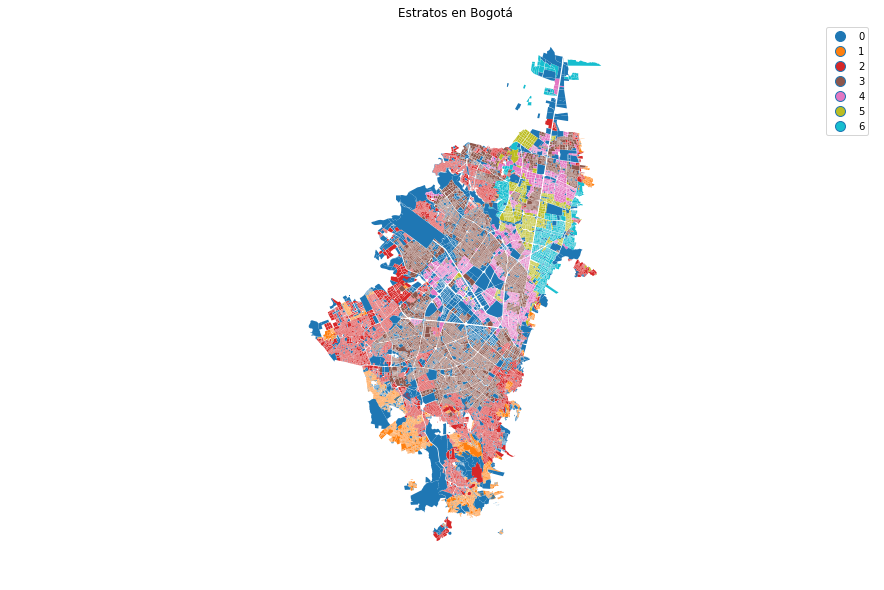

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title(u'Estratos en Bogotá')

estratos.plot(column='estrato', categorical=True, legend=True, ax=ax)

ax.set_axis_off()
plt.axis('equal')

## Información localidades

### Cargue la información de las localidades. Conserve todas las localidades menos Sumapaz.

In [ ]:
df_localidades = gpd.read_file('data/uber/bogota_localidades.geojson')
df_localidades = df_localidades.loc[df_localidades['CODIGO_LOC'] != '20'] # Filtrar Sumapaz

In [ ]:
df_localidades.head()

OBJECTID          NOMBRE CODIGO_LOC              DECRETO  LINK SIMBOLO  \
0         1        SANTA FE          3  Acuerdo 117 de 2003  None    None   
1        11   PUENTE ARANDA         16    Acuerdo 8 de 1977  None    None   
2        13  CIUDAD BOLIVAR         19   Acuerdo 14 de 1983  None    None   
3         6  BARRIOS UNIDOS         12    Acuerdo 8 de 1977  None    None   
4         2            SUBA         11    Acuerdo 8 de 1977  None    None   

  ESCALA_CAP FECHA_CAPT    SHAPE_AREA     SHAPE_LEN  \
0       None       None  4.517065e+07  43779.905440   
1       None       None  1.731115e+07  17854.555403   
2       None       None  1.299864e+08  77732.027669   
3       None       None  1.190345e+07  13426.542795   
4       None       None  1.005606e+08  65665.349126   

                                            geometry  
0  POLYGON ((-74.06856265714661 4.627917706598259...  
1  POLYGON ((-74.11829863986144 4.637411585408281...  
2  POLYGON ((-74.15216009957933 4.599758614797869...  
3  POLYGON ((-74.05724703178382 4.686836295669596...  
4  POLYGON ((-74.04245386600061 4.830660965527887...

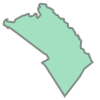

In [ ]:
df_localidades.loc[7,'geometry']

In [ ]:
localidades = df_localidades[['CODIGO_LOC', 'geometry', 'SHAPE_AREA']]
localidades.rename(index=str, columns={"SHAPE_AREA": "shape_area_loc"}, inplace=True)

/home/ssierral/anaconda2/envs/sierraenv/lib/python2.7/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


#### Ejercicio
Haga un **`spatial join`**, entre los estratos y las localidades. 

In [ ]:
# INGRESE SU CÓDIGO AQUÍ


In [ ]:
# PRUEBE SU CÓDIGO AQUÍ
#Index_right copia el valor del indice del dataframe de la derecha, este valor no lo necesitamos

estratos_localidades.drop('index_right', axis=1, inplace=True) 
estratos_localidades.head()

In [ ]:
# NO MODIFIQUE ESTA CELDA

estratos_localidades.drop('index_right', axis=1, inplace=True)
estratos_localidades.head()

id   manzana    shape_area    shape_len  estrato  \
0  43421  00260601  61354.848985  1990.056871        2   
1  43460  00260549    595.400837    97.903820        0   
2  43453  00252714   1800.647864   169.204418        2   
3  43470  00260532   1137.075717   163.131125        1   
4  43486  00250606   2207.096432   232.198962        2   

                                            geometry CODIGO_LOC  \
0  POLYGON ((-74.10284641458252 4.512802572112657...          5   
1  POLYGON ((-74.10205090927423 4.510120330233975...          5   
2  POLYGON ((-74.10705935714046 4.510386791510661...          5   
3  POLYGON ((-74.10373634567594 4.509743808347334...          5   
4  POLYGON ((-74.10636192782435 4.509094172763362...          5   

   shape_area_loc  
0    2.150664e+08  
1    2.150664e+08  
2    2.150664e+08  
3    2.150664e+08  
4    2.150664e+08

#### Ejercicio
Visualice solo las manzanas que pertenecen a Kennedy en el mapa de Bogotá.

In [ ]:
# INGRESE SU CÓDIGO AQUÍ


In [ ]:
# PRUEBE AQUÍ SU CÓDIGO

f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title(u'Localidad de Kennedy')

df_kennedy.plot(legend=True, ax=ax) # k nos permite controlar el número de clases para el mapa

df_bogota_filtered.plot(color='None', edgecolor='black', linewidth=0.1, ax=ax)

ax.set_axis_off()
plt.axis('equal')

(-74.23244790000001, -73.98948209999999, 4.4353856, 4.8560783999999995)

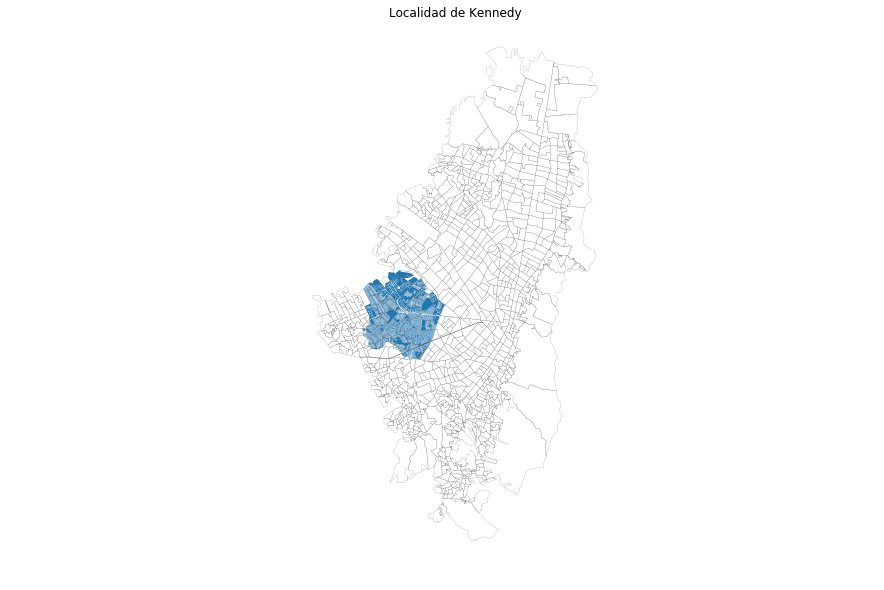

In [ ]:
# NO MODIFIQUE ESTA CELDA

f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title(u'Localidad de Kennedy')

df_kennedy.plot(legend=True, ax=ax) # k nos permite controlar el número de clases para el mapa

df_bogota_filtered.plot(color='None', edgecolor='black', linewidth=0.1, ax=ax)

ax.set_axis_off()
plt.axis('equal')

## Distribución de estratos por localidad

A continuación encontramos que cada polígono tiene asociado un área. Vamos a hallar qué estrato tiene más porcentaje de área en Kennedy.

In [ ]:
estratos_localidades.head()

id   manzana    shape_area    shape_len  estrato  \
0  43421  00260601  61354.848985  1990.056871        2   
1  43460  00260549    595.400837    97.903820        0   
2  43453  00252714   1800.647864   169.204418        2   
3  43470  00260532   1137.075717   163.131125        1   
4  43486  00250606   2207.096432   232.198962        2   

                                            geometry CODIGO_LOC  \
0  POLYGON ((-74.10284641458252 4.512802572112657...          5   
1  POLYGON ((-74.10205090927423 4.510120330233975...          5   
2  POLYGON ((-74.10705935714046 4.510386791510661...          5   
3  POLYGON ((-74.10373634567594 4.509743808347334...          5   
4  POLYGON ((-74.10636192782435 4.509094172763362...          5   

   shape_area_loc  
0    2.150664e+08  
1    2.150664e+08  
2    2.150664e+08  
3    2.150664e+08  
4    2.150664e+08

#### Ejercicio

Vamos a generar el total de área por localidad y estrato. Para esto se debe generar un groupby de pandas usando las columnas `CODIGO_LOC` y `estrato`. Recuerde llamar `.reset_index()` para que la localidad y el estrato sigan siendo columnas del nuevo dataframe.

In [ ]:
# INGRESE SU CÓDIGO AQUÍ



In [ ]:
# PRUEBE AQUÍ SU CÓDIGO

areas_groupings.head()

In [ ]:
# NO MODIFIQUE ESTA CELDA

areas_groupings.head()

CODIGO_LOC  estrato    shape_area
0          1        0  7.658636e+06
1          1        1  7.703923e+05
2          1        2  1.232852e+06
3          1        3  3.893668e+06
4          1        4  4.454413e+06

#### Ejercicio

Añada una columna adicional que contenga el área total de cada localidad. 

In [ ]:
# INGRESE SU CÓDIGO AQUÍ


In [ ]:
# PRUEBE AQUÍ SU CÓDIGO

area_estratos_localidad.head()

In [ ]:
# NO MODIFIQUE ESTA CELDA

area_estratos_localidad.head()

CODIGO_LOC  estrato    shape_area  shape_area_loc
0          1        0  7.658636e+06    6.531573e+07
1          1        1  7.703923e+05    6.531573e+07
2          1        2  1.232852e+06    6.531573e+07
3          1        3  3.893668e+06    6.531573e+07
4          1        4  4.454413e+06    6.531573e+07

In [ ]:
area_estratos_localidad['ratio'] = area_estratos_localidad['shape_area']/area_estratos_localidad['shape_area_loc']

### Ejercicio 

Usando plotly, visualice el porcentaje de área por estrato en la localidad de Kennedy

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

strata = area_estratos_localidad.loc[area_estratos_localidad['CODIGO_LOC'] == '8', 'estrato']

ratio = area_estratos_localidad.loc[area_estratos_localidad['CODIGO_LOC'] == '8', 'ratio']

In [ ]:
## INGRESE Y PRUEBE AQUÍ SU CÓDIGO


NO MODIFIQUE ESTA CELDA

![](https://i.imgur.com/oWY4JDz.png)

## Integremos la información de UBER Movement con la información del estrato y localidad.

Hasta el momento, hemos hecho un análisis descriptivo de las localidades y los estratos en la ciudad de Bogotá D.C.. Sin embargo, aún no hemos relacionado esta información con los datos de tiempos de viajes entre zonas de Bogotá. Al analizar esta situación, nos encontramos con un problema:

- La granularidad de los datos es diferente. Mientras que la información de estratos está a nivel de manzanas, la información de movilidad de Uber se encuentra a nivel de conjuntos de barrios (Similar a una [UPZ](https://es.wikipedia.org/wiki/Unidades_de_Planeamiento_Zonal)). De la misma forma pasa entre la información de Uber y la información de las localidades

Para anotar las *zonas de uber*, usaremos una función de agregación espacial, conocida como `geopandas.dissolve`. Sin embargo, antes debemos combinar el dataframe `estratos_localidades` con la información de Uber (`df_bogota`). A continuación, podemos observar que esto lo logramos usando `gpd.sjoin`. Observamos que al final del nuevo DataFrame, existe una columna `MOVEMENT_ID` que vincula la manzana con su respectiva zona de Uber.

In [ ]:
df_bogota_uber = df_bogota[['MOVEMENT_ID', 'geometry']] #Versión reducida de df_bogota
# Hacemos unión espacial preguntando si una manzana se encuentra contenida en una determinada zona de Uber
df_bogota_uber = gpd.sjoin(estratos_localidades, df_bogota_uber, how="inner", op='within') 
# Eliminamos index_right
df_bogota_uber.drop('index_right', axis=1, inplace=True)

In [ ]:
df_bogota_uber.head()

id   manzana   shape_area    shape_len  estrato  \
1   43460  00260549   595.400837    97.903820        0   
3   43470  00260532  1137.075717   163.131125        1   
10  43482  00260524  1933.053801   210.514007        1   
13  43463  00260522  7148.041184  1088.189007        1   
20  43474  00260529  1057.700962   137.622975        1   

                                             geometry CODIGO_LOC  \
1   POLYGON ((-74.10205090927423 4.510120330233975...          5   
3   POLYGON ((-74.10373634567594 4.509743808347334...          5   
10  POLYGON ((-74.10174963243327 4.509400892724955...          5   
13  POLYGON ((-74.10079449144534 4.509713897783399...          5   
20  POLYGON ((-74.10304584061723 4.509265026320508...          5   

    shape_area_loc  MOVEMENT_ID  
1     2.150664e+08         1137  
3     2.150664e+08         1137  
10    2.150664e+08         1137  
13    2.150664e+08         1137  
20    2.150664e+08         1137

#### Ejercicio

Genere un nuevo DataFrame `df_bogota_uber_agg`, que a través de la función `geopandas.dissolve` agregue las manzanas que corresponden a una zona de Uber. La función de agregación que usaremos consiste en el estrato con mayor frecuencia dentro de esa zona de uber. 

La función de agregación que regresa el elemento de mayor frecuencia en un grupo es:
```python
lambda x:x.value_counts().index[0]
```

[Enlace StackOverflow](https://stackoverflow.com/questions/48680608/function-to-return-the-highest-count-value-using-a-rule)

In [ ]:
# INGRESE SU CÓDIGO AQUÍ

df_bogota_uber_agg = 

In [ ]:
# PRUEBE SU CÓDIGO AQUÍ

df_bogota_uber_agg.reset_index(inplace=True)
df_bogota_uber_agg.head()

In [ ]:
# NO MODIFIQUE ESTA CELDA

df_bogota_uber_agg.reset_index(inplace=True)
df_bogota_uber_agg.head()

MOVEMENT_ID                                           geometry     id  \
0            1  (POLYGON ((-74.20310748630153 4.60964265266627...  14398   
1            3  POLYGON ((-74.11029613210192 4.486242755191304...  26062   
2            4  (POLYGON ((-74.0950641374056 4.682848705834439...   6443   
3            5  (POLYGON ((-74.09599438285443 4.73515747514524...   1852   
4            6  (POLYGON ((-74.07065929814955 4.64068645062739...   9756   

    manzana   shape_area   shape_len  estrato CODIGO_LOC  shape_area_loc  
0  004575Y9  4735.226401  401.969377        2          7    2.393545e+07  
1  10250202  3901.914944  269.090069        1          5    2.150664e+08  
2  00550117  2383.619627  237.658937        3         10    3.588097e+07  
3  00924090  1770.577218  206.676242        3         11    1.005606e+08  
4  00720816  3326.522755  290.595315        4         13    1.419317e+07

In [ ]:
df_bogota_uber_agg.count()

MOVEMENT_ID       948
geometry          948
id                948
manzana           948
shape_area        948
shape_len         948
estrato           948
CODIGO_LOC        948
shape_area_loc    948
dtype: int64

El resultado final son 948 zonas de Uber anotadas con estrato y localidad

Ahora queremos combinar esta información con los datos de viaje. Crearemos cuatro columnas adicionales en `df_2017_2`. Vamos a añadir el estrato de la zona origen, el estrato de la zona destino, la localidad de la zona origen y la localidad de la zona destino.

In [ ]:
# Fusionamos df_2017_2 con df_bogota_uber_agg.
# Añadimos la columna source_estrato y source_loc

df_all = pd.merge(df_2017_2[['sourceid', 'dstid', 'hod', 'mean_travel_time']], 
                  df_bogota_uber_agg[['MOVEMENT_ID', 'estrato', 'CODIGO_LOC']], 
                  left_on = 'sourceid', 
                  right_on = 'MOVEMENT_ID')
df_all = df_all.drop(columns=['MOVEMENT_ID'])
df_all.rename(columns={'estrato': 'source_estrato', 'CODIGO_LOC': 'source_loc'}, inplace=True)

# Fusionamos df_2017_2 con df_bogota_uber_agg.
# Añadimos la columna dst_estrato y dst_loc

df_all = pd.merge(df_all, 
                  df_bogota_uber_agg[['MOVEMENT_ID', 'estrato', 'CODIGO_LOC']], 
                  left_on = 'dstid', 
                  right_on = 'MOVEMENT_ID')
df_all = df_all.drop(columns=['MOVEMENT_ID'])
df_all.rename(columns={'estrato': 'dst_estrato', 'CODIGO_LOC': 'dst_loc'}, inplace=True)

In [ ]:
df_all.head()

sourceid  dstid  hod  mean_travel_time  source_estrato source_loc  \
0         4      6    0            853.22               3         10   
1         4      6    1            876.30               3         10   
2         4      6    2            613.33               3         10   
3         4      6    5            950.24               3         10   
4         4      6    6           1281.92               3         10   

   dst_estrato dst_loc  
0            4      13  
1            4      13  
2            4      13  
3            4      13  
4            4      13

#### Ejercicio

Teniendo los estratos origen y destino, podemos formularnos preguntas como:
- ¿Qué tan comunes son los viajes de estrato 6 a cualquier estrato en horas pico? 
- ¿Cuánto tiempo toma en promedio un viaje entre estrato 6 y cualquier estrato en horas pico?

In [ ]:
# ESCRIBA SU CÓDIGO AQUÍ

# Filtre df_all por las horas pico (7, 8, 9, 17, 18, 19)

# Filtre el anterior dataframe también por source_estrato igual a 6

# Genere df_from_e6_mean agrupando los valores por el estrato destino y use mean() como función de agregación

# Genere df_from_e6_count agrupando los valores por el estrato destino y use count() como función de agregación

In [ ]:
# PRUEBE SU CÓDIGO AQUÍ

print(df_from_e6_mean['mean_travel_time'])
print('---------------')
print(df_from_e6_count['sourceid'])

In [ ]:
# NO MODIFIQUE LA SIGUIENTE CELDA

print(df_from_e6_mean['mean_travel_time'])
print('---------------')
print(df_from_e6_count['sourceid'])

dst_estrato
0.0    2098.474012
1.0    1605.665908
2.0    2380.233225
3.0    2091.056049
4.0    1719.709806
5.0    1294.455041
6.0    1235.372797
Name: mean_travel_time, dtype: float64
---------------
dst_estrato
0.0     3906
1.0     1349
2.0    10301
3.0    29815
4.0    11729
5.0     4838
6.0     4362
Name: sourceid, dtype: int64


#### Ejercicio

Genere el diagrama de líneas para la frecuencia de viajes y para el tiempo promedio entre estratos en Plot.ly

In [ ]:
# INGRESE SU CÓDIGO AQUÍ


NO MODIFIQUE ESTA CELDA

![](https://i.imgur.com/WvSKHI5.png)

In [ ]:
# INGRESE SU CÓDIGO AQUÍ


NO MODIFIQUE ESTA CELDA:

![](https://i.imgur.com/pZFEzHL.png)

### Bonus:

Cree una gráfica de Plot.ly que permita visualizar la distribución de estratos de todas las localidades. (Parecido al ejercicio de porcentaje de triples por posición y por equipos en el taller de la NBA)